In [2]:
import pandas as pd

df = pd.read_excel('Spotify_data.xlsx')

In [3]:
dd = pd.read_csv('스파르타(튜터) - 스포티파이 데이터_2.csv')
dd['timestamp'].unique()

array(['2023-07-01'], dtype=object)

In [4]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [5]:
df.describe()

,music_recc_rating
count,520.000000
mean,3.503846
std,0.979552
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       520 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [7]:
# for col in df.columns:
#     print(col)
#     print(df[col].unique())
#     print()

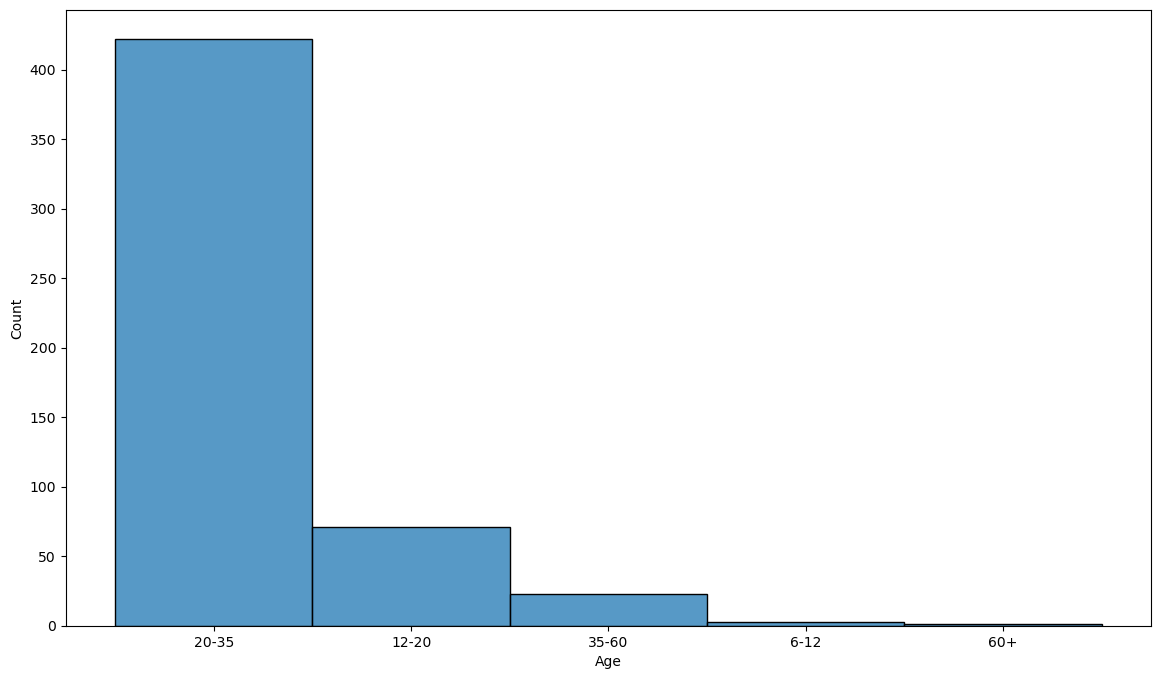

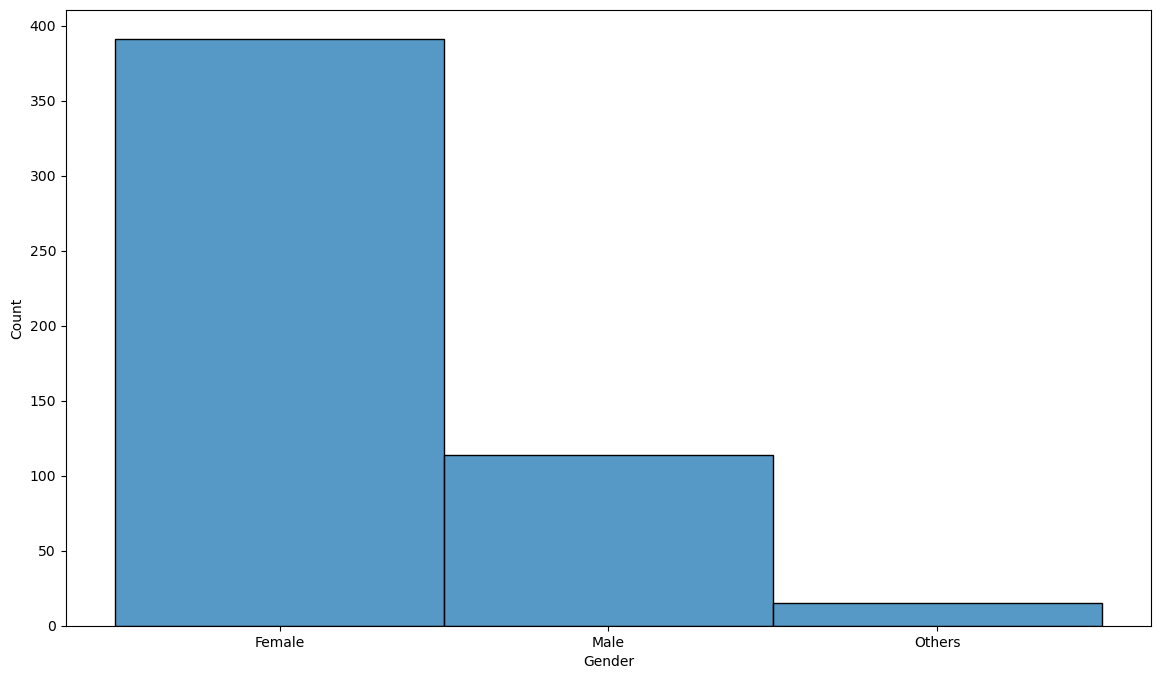

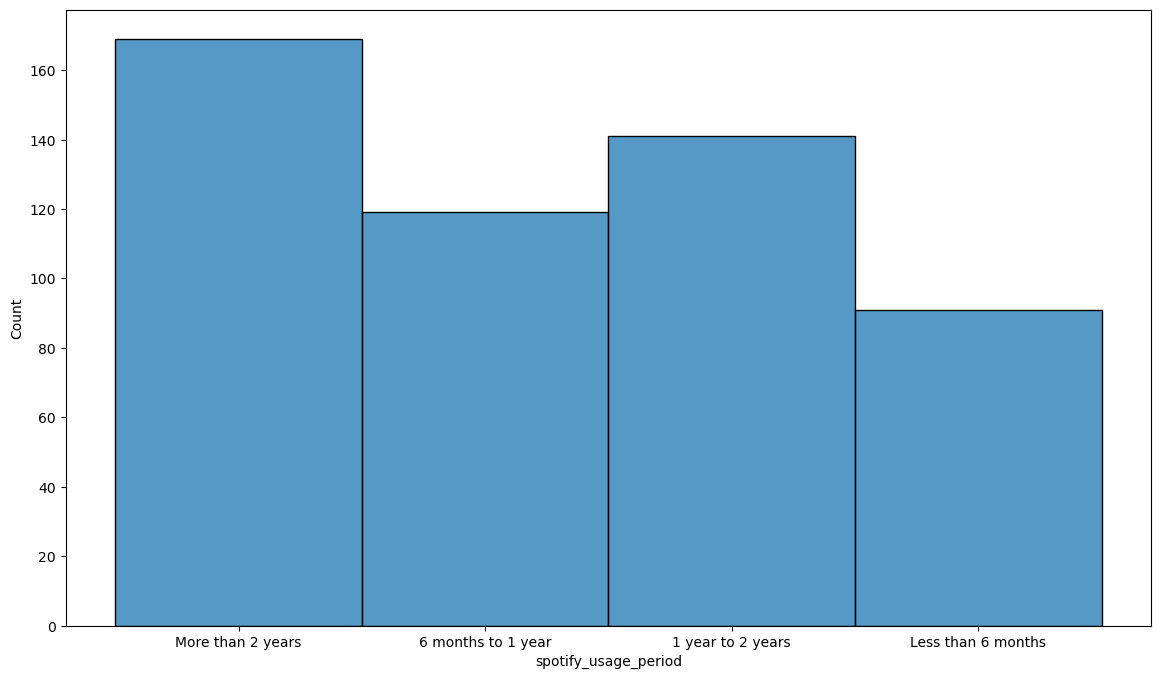

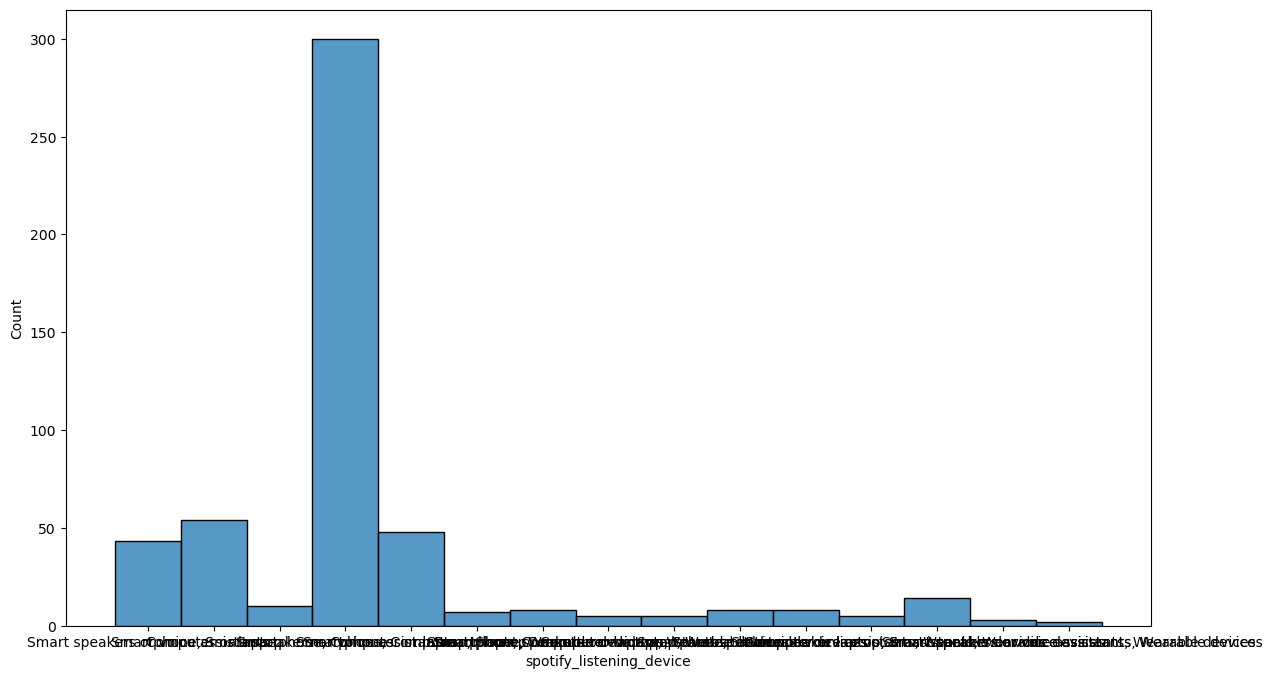

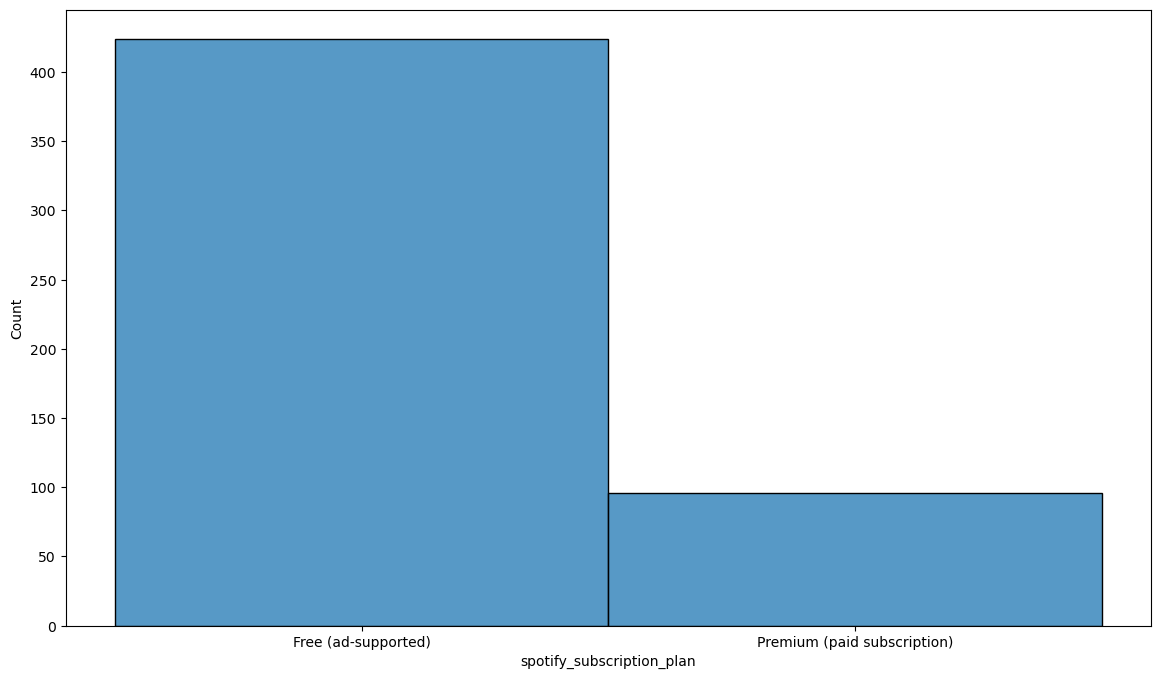

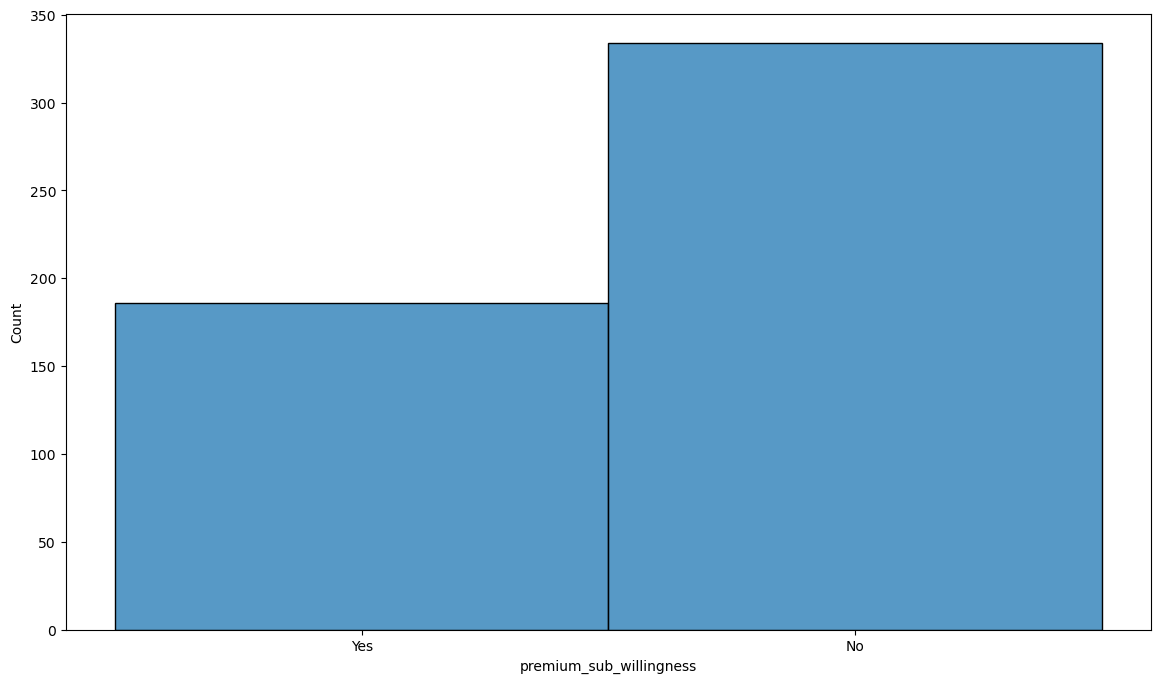

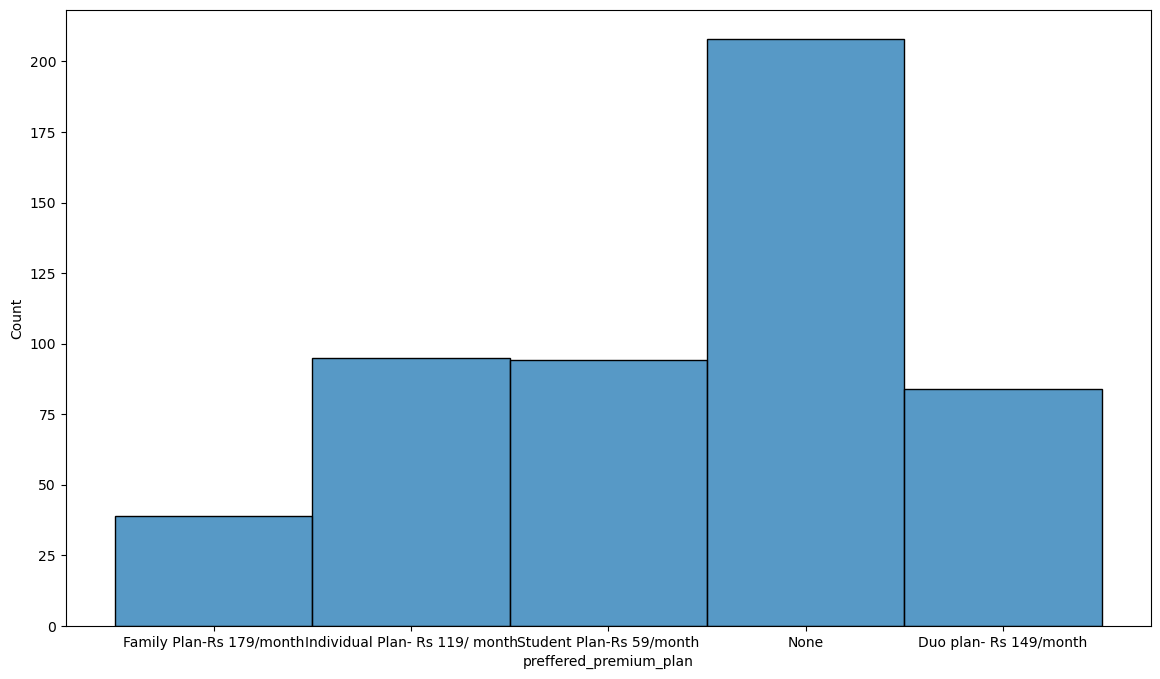

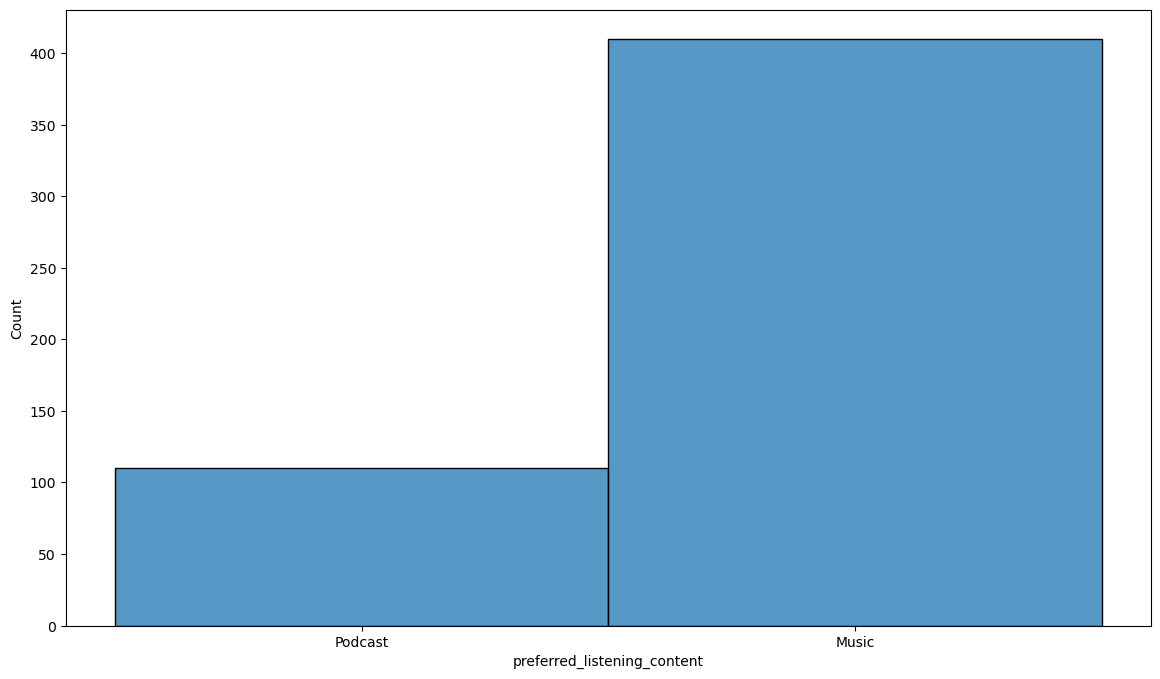

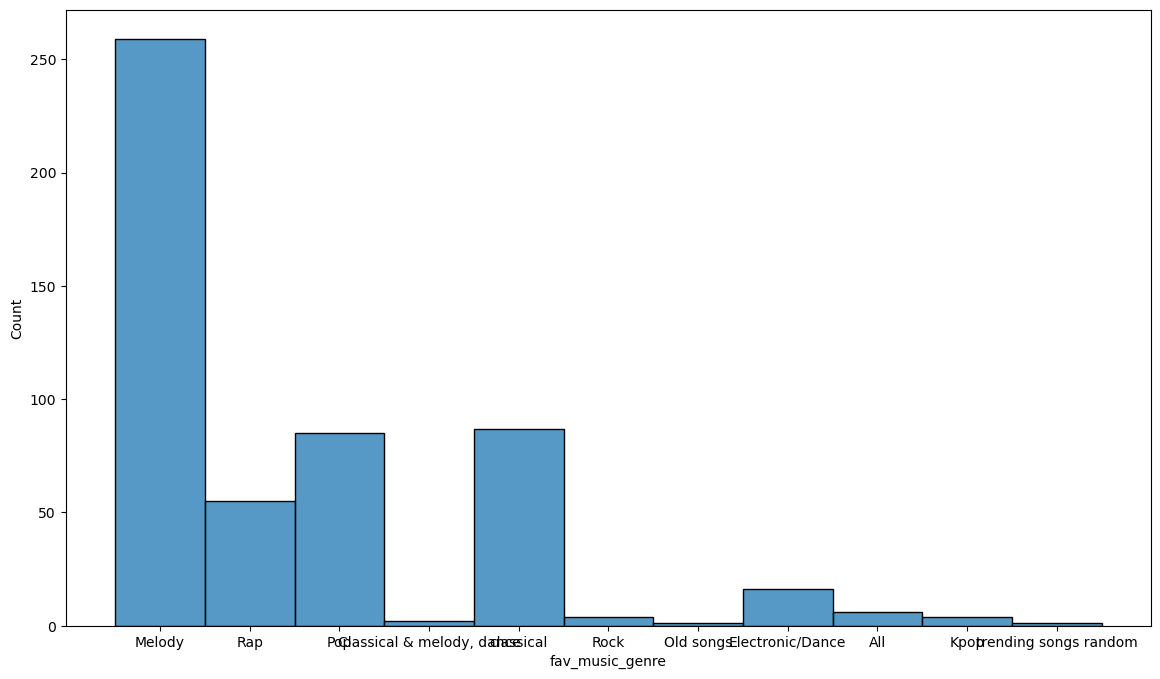

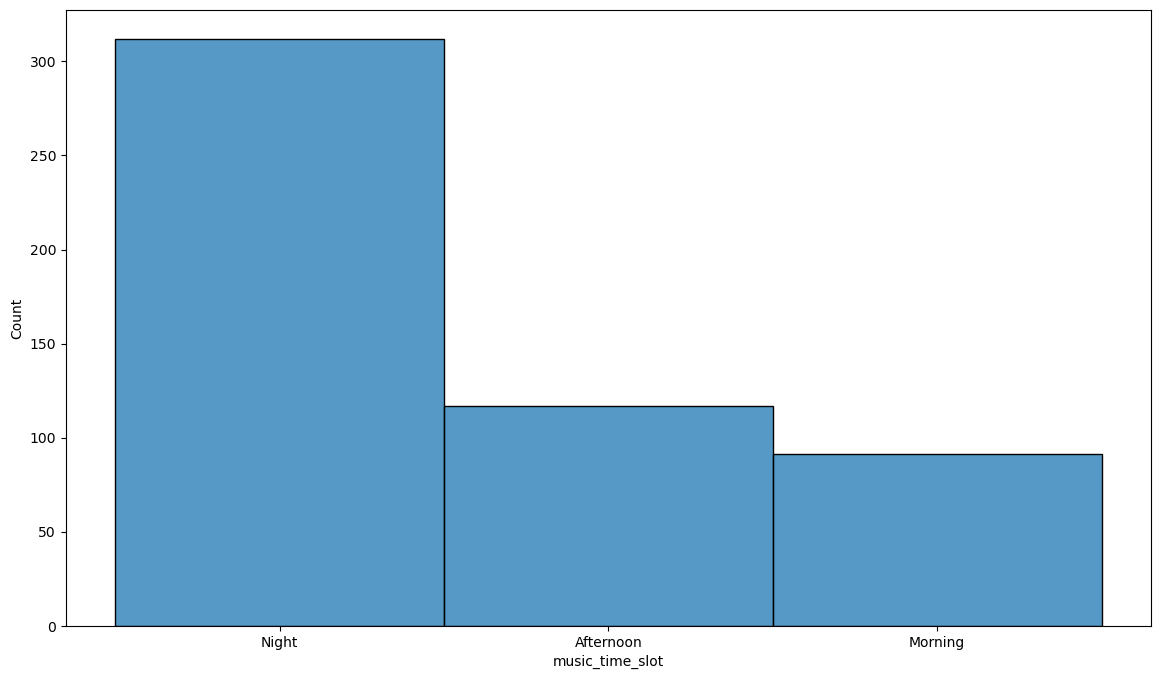

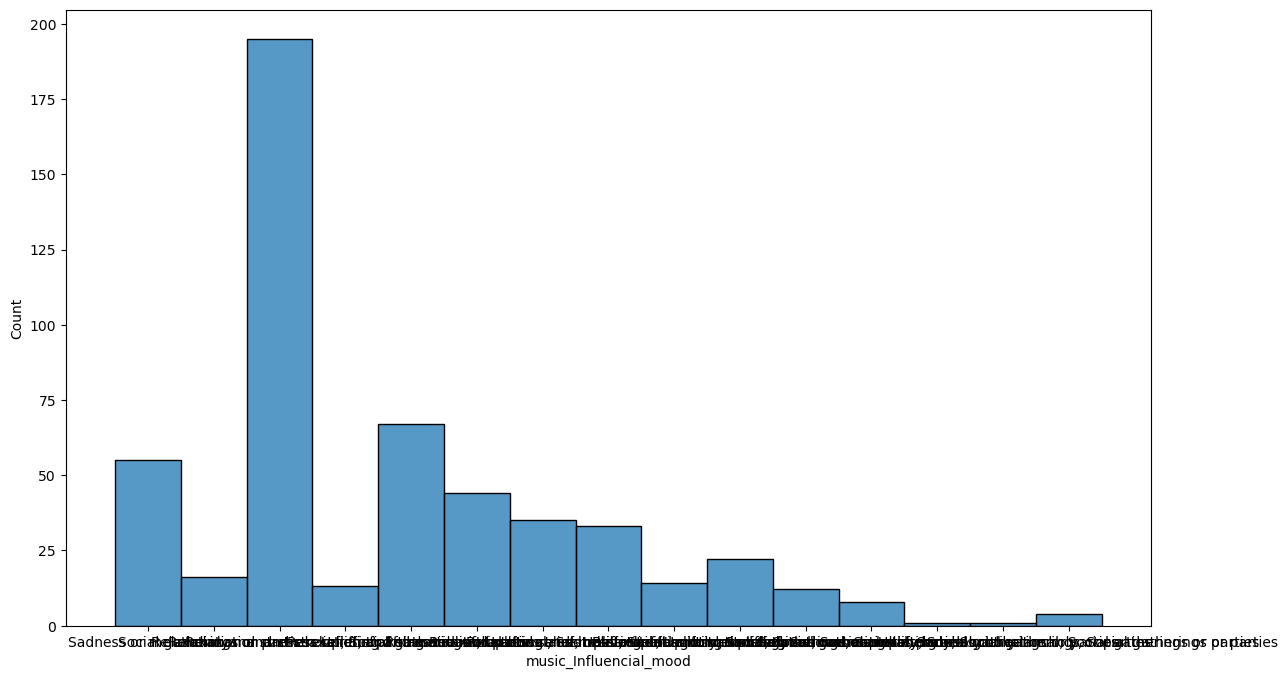

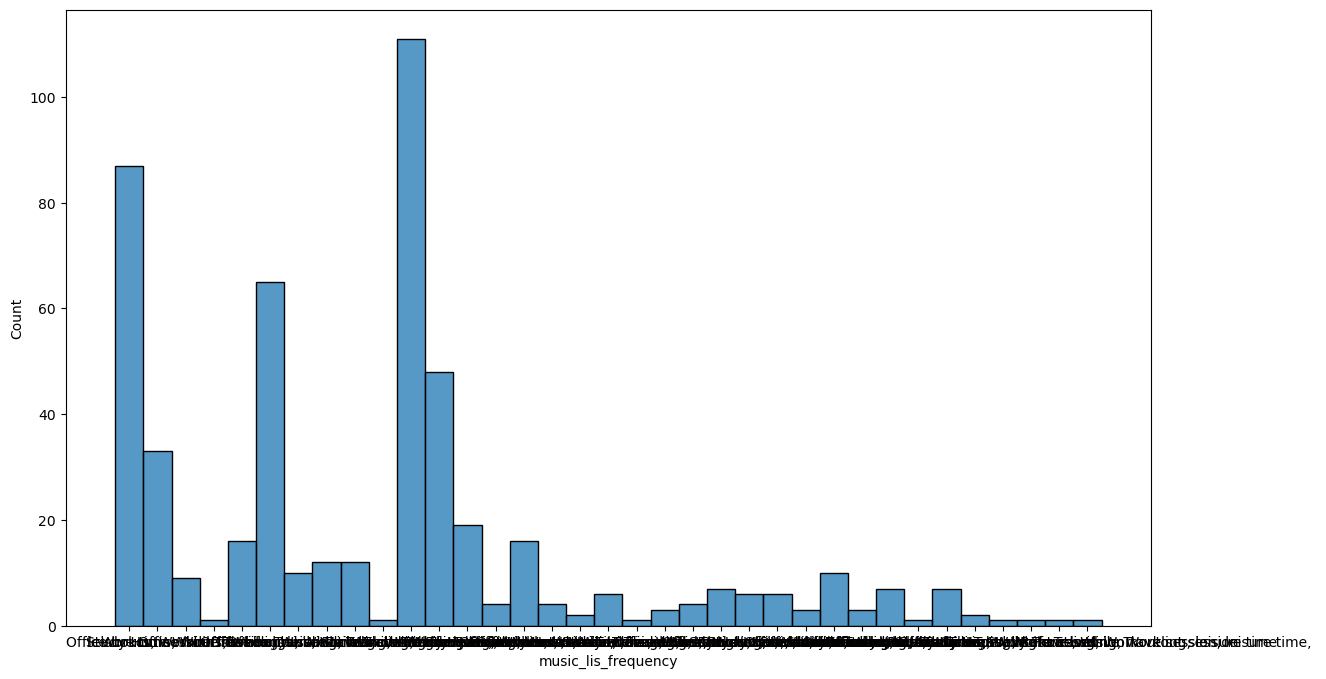

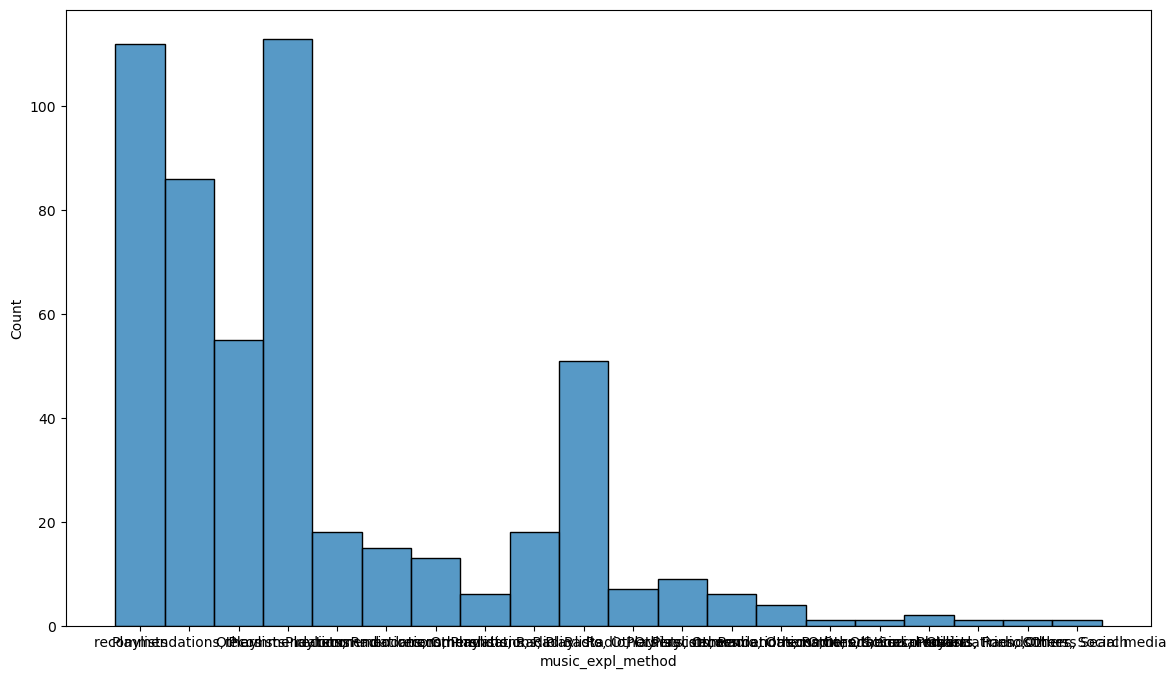

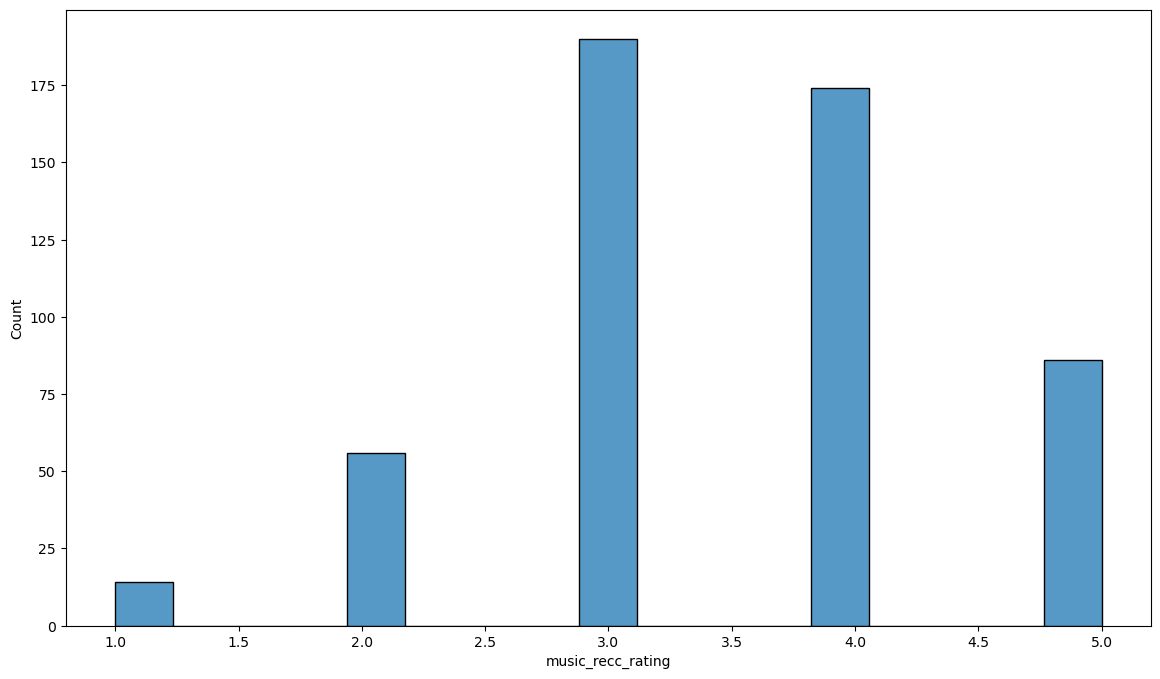

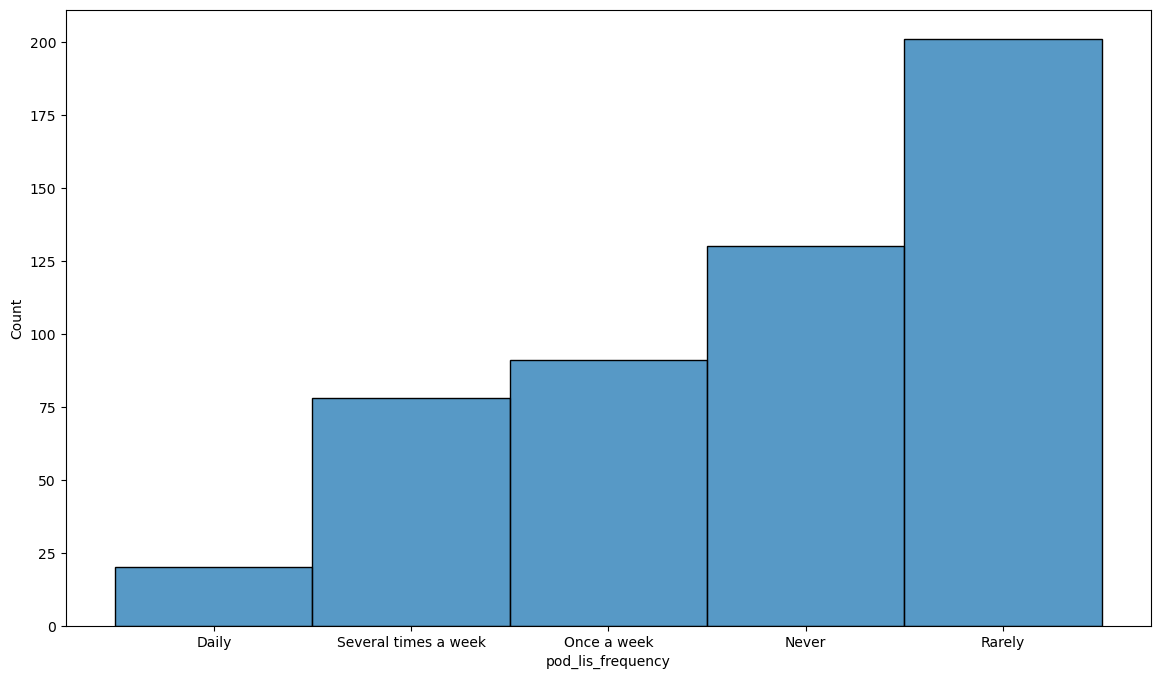

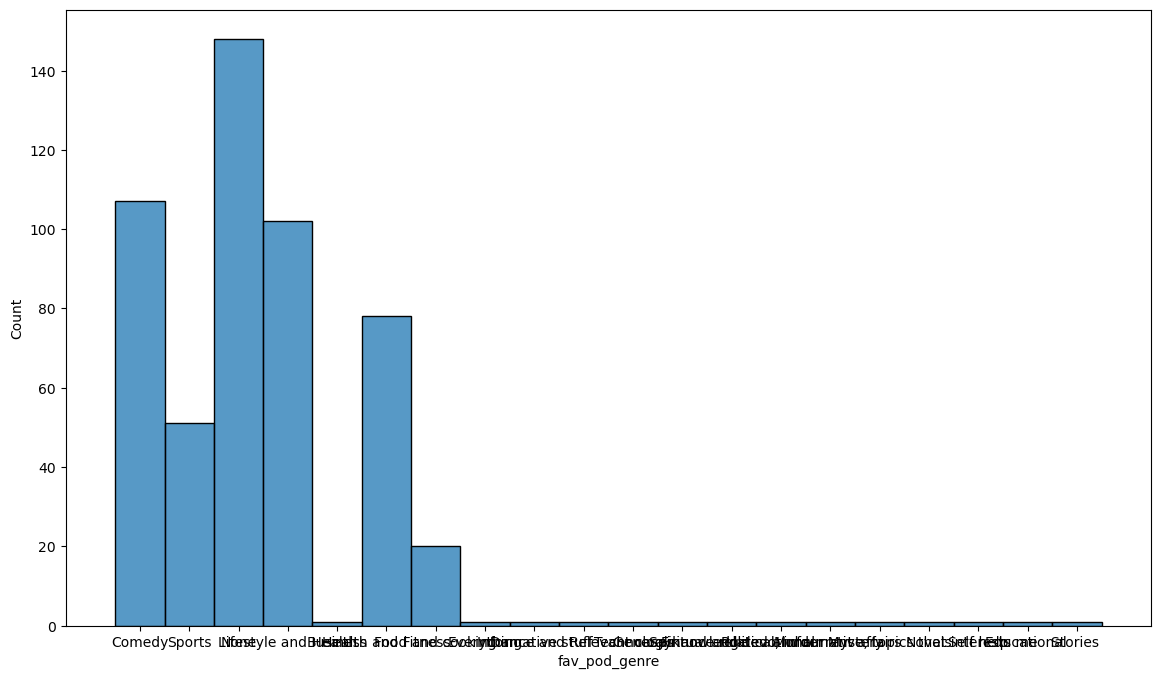

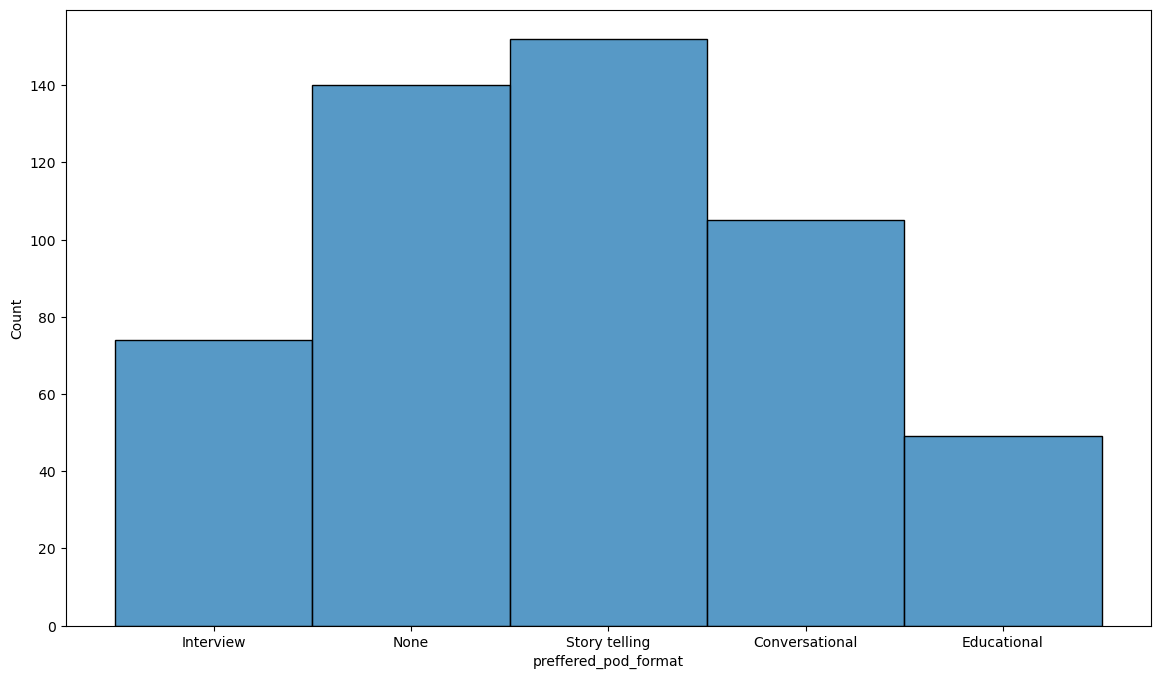

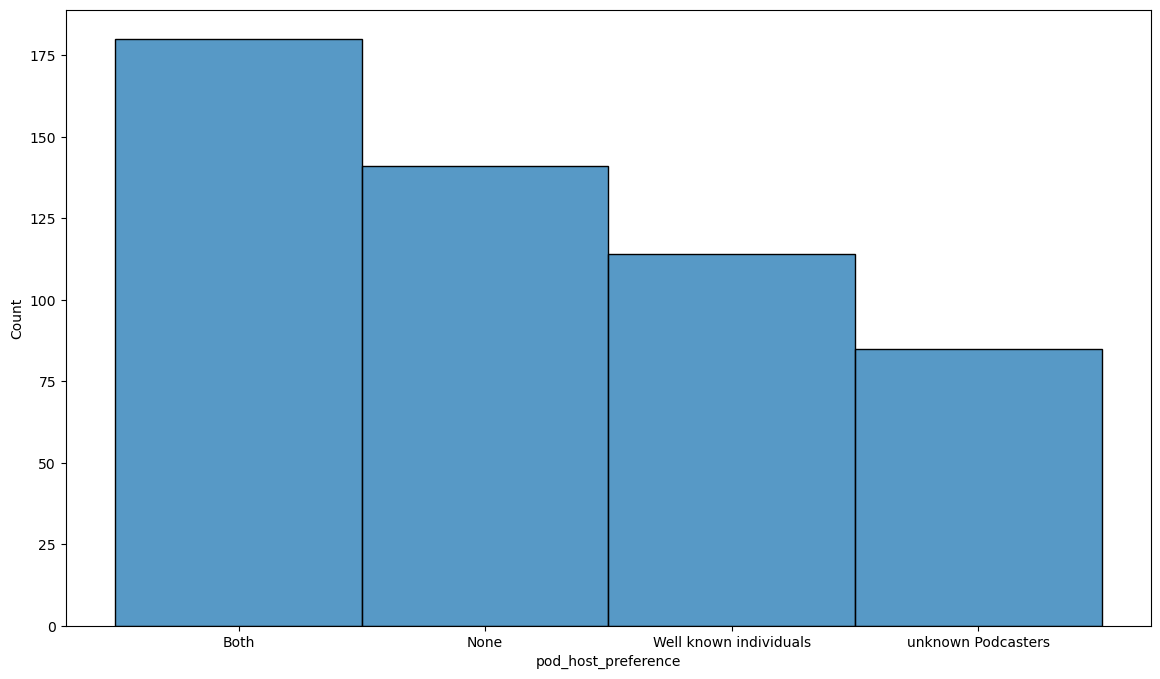

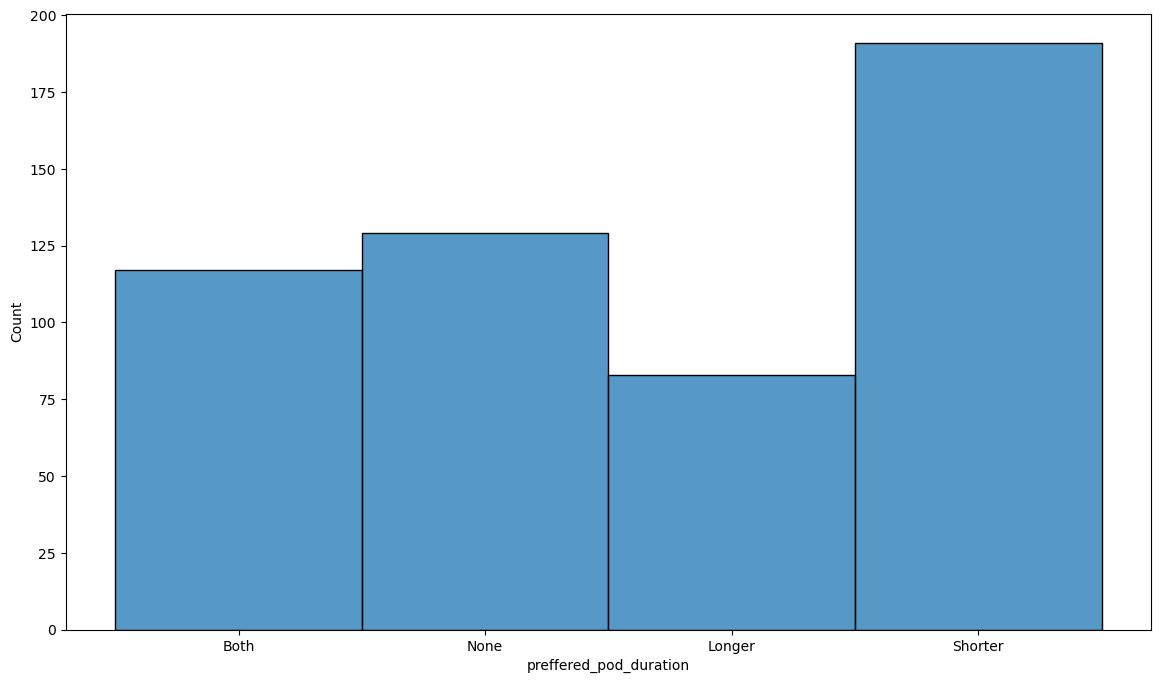

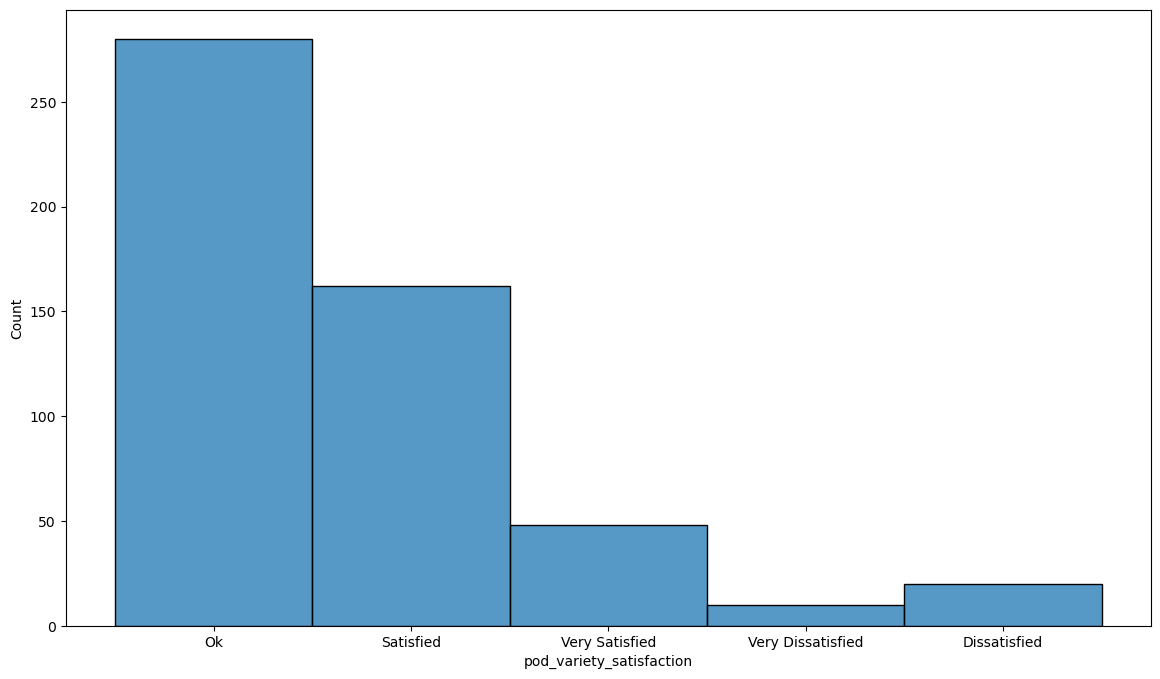

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    data = df[col]
    plt.figure(figsize=(14, 8))
    sns.histplot(data)
    plt.show()

In [9]:
import plotly.express as px
device = df.reset_index(names='index')
fig = px.sunburst(device, path=['spotify_listening_device'], values='index')
fig.show()

In [10]:
fig = px.sunburst(device, path=['music_Influencial_mood'], values='index')
fig.show()

In [11]:
fig = px.sunburst(device, path=['music_lis_frequency'], values='index')
fig.show()

In [12]:
fig = px.sunburst(device, path=['music_expl_method'], values='index')
fig.show()

In [13]:
device = device.dropna()
fig = px.sunburst(device, path=['fav_pod_genre'], values='index')
fig.show()

In [14]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df2)
# profile

## RFM

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
revenue = pd.read_csv('스파르타(튜터) - 매출지표.csv')
revenue.head()

,userid,spotify_subscription_plan,revenue,timestamp
0,1,Premium (paid subscription),60000,2023-01-01
1,2,Premium (paid subscription),60000,2023-01-01
2,3,Premium (paid subscription),60000,2023-01-01
3,4,Premium (paid subscription),60000,2023-01-01
4,5,Premium (paid subscription),60000,2023-01-01


In [17]:
revenue['month'] = pd.to_datetime(revenue['timestamp'], format='%Y-%m-%d').dt.month
revenue.head()

,userid,spotify_subscription_plan,revenue,timestamp,month
0,1,Premium (paid subscription),60000,2023-01-01,1
1,2,Premium (paid subscription),60000,2023-01-01,1
2,3,Premium (paid subscription),60000,2023-01-01,1
3,4,Premium (paid subscription),60000,2023-01-01,1
4,5,Premium (paid subscription),60000,2023-01-01,1


In [18]:
recency = revenue[revenue['spotify_subscription_plan'] == 'Premium (paid subscription)'].groupby('userid')['month'].apply('max')
frequency = revenue[revenue['spotify_subscription_plan'] == 'Premium (paid subscription)'].groupby('userid')['userid'].apply('count')
monetary = revenue[revenue['spotify_subscription_plan'] == 'Premium (paid subscription)'].groupby(['userid'])['revenue'].apply('sum')

In [19]:
rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm.columns = ['recency', 'frequency', 'monetary']
rfm

,recency,frequency,monetary
userid,,,
1,1,1,60000
2,5,2,120000
3,6,4,240000
4,6,4,240000
5,6,4,240000
...,...,...,...
514,6,4,240000
515,6,2,120000
516,5,1,60000


In [20]:
rfm[['recency', 'frequency', 'monetary']].describe()

,recency,frequency,monetary
count,354.000000,354.000000,354.000000
mean,5.022599,2.220339,133220.338983
std,1.192302,1.468087,88085.215204
min,1.000000,1.000000,60000.000000
25%,4.000000,1.000000,60000.000000
50%,5.000000,2.000000,120000.000000
75%,6.000000,3.000000,180000.000000
max,6.000000,6.000000,360000.000000


In [21]:
from numpy import unique
from numpy import where

## SCALE

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_features = sc.fit_transform(rfm[['recency', 'frequency', 'monetary']])

In [23]:
X_features.shape[0]

354

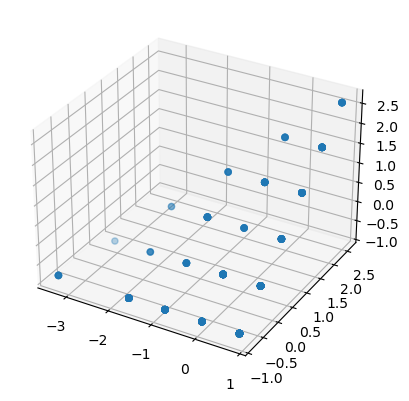

In [24]:
#분류하기 전
a = pd.Series([x[0] for x in X_features])
b = pd.Series([x[1] for x in X_features])
c = pd.Series([x[2] for x in X_features])
rfm_normalized = pd.concat([a, b, c], axis=1)
rfm_normalized.columns = ['r', 'f', 'm']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_normalized['r'], rfm_normalized['f'], rfm_normalized['m'])

In [25]:
import numpy as np
x_f =  np.sort(X_features, axis=0)
prev = x_f[0]
count = 1
for x in x_f:
    if np.array_equal(x, prev):
        continue
    else:
        count += 1
        prev = x
        
count

11

In [26]:
revenue['timestamp'].unique()

array(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
       '2023-05-01', '2023-06-01'], dtype=object)

## KMEANS

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_label = kmeans.fit_predict(X_features)
rfm['kmeans'] = kmeans_label

silhouette_score(X_features, kmeans_label)

/Users/dongjekim/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.5445332021317282

/Users/dongjekim/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dongjekim/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dongjekim/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/dongjekim/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



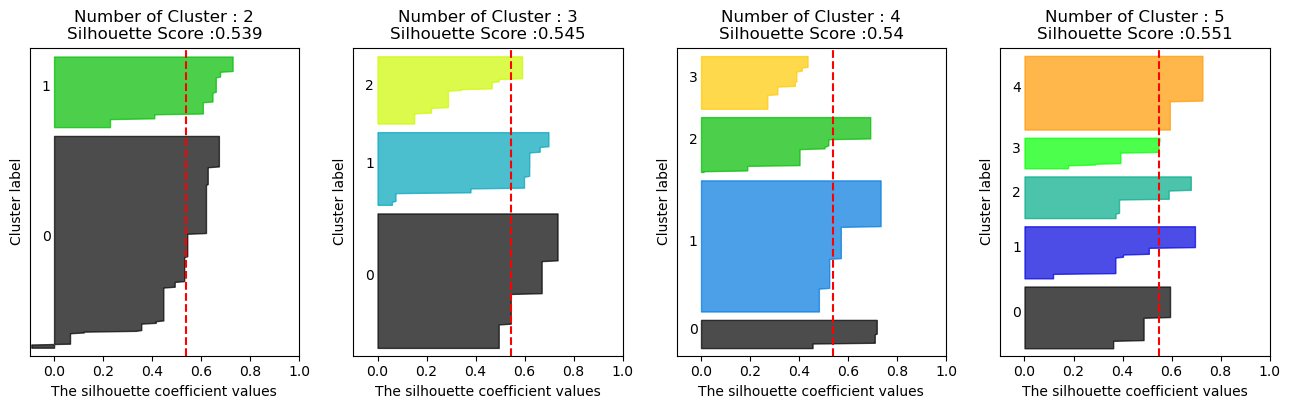

In [28]:
from kmeans_visual import visualize_silhouette
visualize_silhouette([2, 3, 4, 5], X_features)

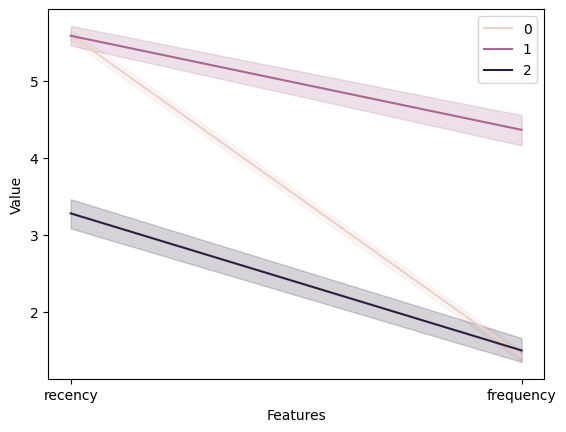

In [29]:
rfm_df = rfm.reset_index()
melted = pd.melt(rfm_df, id_vars=['userid', 'kmeans'], value_vars=['recency', 'frequency'], var_name='Features', value_name='Value')
sns.lineplot(x='Features', y='Value', hue='kmeans', data=melted)
plt.legend()

<Axes: xlabel='recency', ylabel='frequency'>

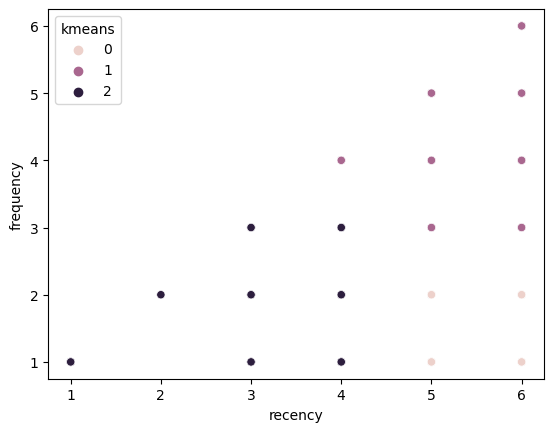

In [30]:
sns.scatterplot(data=rfm, x='recency', y='frequency', hue='kmeans')

## T TEST

In [47]:
import pandas as pd
df = pd.read_csv('스파르타(튜터) - 스포티파이 데이터_2.csv')

In [48]:
df['preferred_listening_content'].unique()

array(['Music', 'Podcast'], dtype=object)

In [49]:
# 무료 사용자, 유료 사용자 수를 말해주기. p value, 4:5, 5:5 비율로 유료 고객 : 무료 고객을 뽑아야한다. --> 이거 어떻게 뽑을까? 
# 순열검정, 부츠트랩

def get_plan(x):
    if x == 'Free (ad-supported)':
        return 'free'
    else:
        return 'premium'
    
def get_podcast(x):
    if x == 'Podcast':
        return 1
    else: 
        return 0
       
df['group'] = df['spotify_subscription_plan'].apply(get_plan)
df['podcast'] = df['preferred_listening_content'].apply(get_podcast)

In [50]:
group_free = df[df['group'] == 'free']
group_premium = df[df['group'] == 'premium']
a_sample_size = group_free['podcast'].shape[0]
b_sample_size = group_premium['podcast'].shape[0]
print(a_sample_size, b_sample_size)

424 96


In [51]:
df[['group', 'podcast_rating']].to_csv('podcast_rating.csv', index=False)

<Axes: xlabel='podcast_rating', ylabel='Count'>

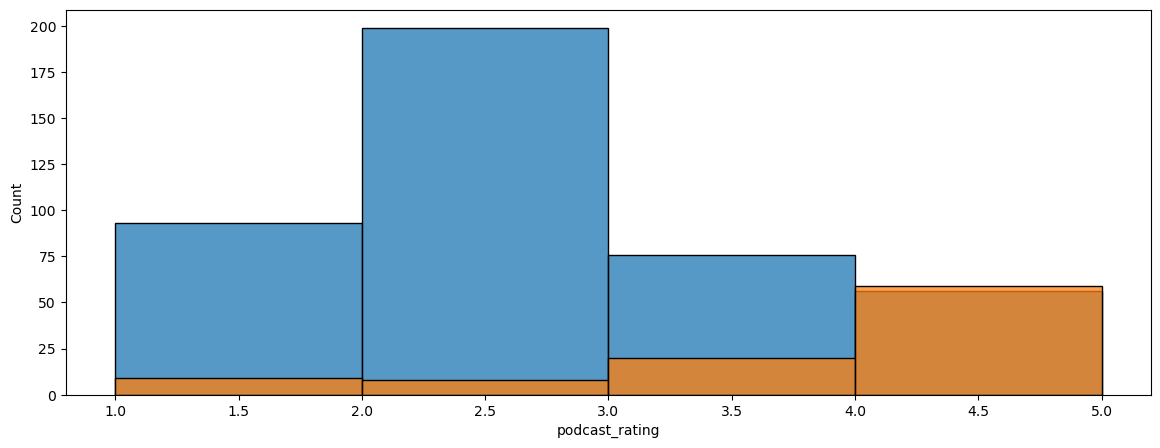

In [52]:
plt.figure(figsize=(14, 5))
sns.histplot(group_free['podcast_rating'], bins=[1, 2, 3, 4, 5])
sns.histplot(group_premium['podcast_rating'], bins=[1, 2, 3, 4, 5])

In [53]:
# 프리미엄 96명과 프리 424 명의 팟캐스트 점수 차이
free_mean = group_free['podcast_rating'].mean()
premium_mean = group_premium['podcast_rating'].mean()
print(f'premium mean {premium_mean:.2f}, free mean {free_mean:.2f}')
print(f'평균 차이 {premium_mean - free_mean:.4f}')

premium mean 3.50, free mean 2.29
평균 차이 1.2123


ShapiroResult(statistic=0.8388787508010864, pvalue=2.3129427186577425e-20) ShapiroResult(statistic=0.8518521189689636, pvalue=2.2867961746442234e-08)
LeveneResult(statistic=0.7726658073473213, pvalue=0.3798011930327253)


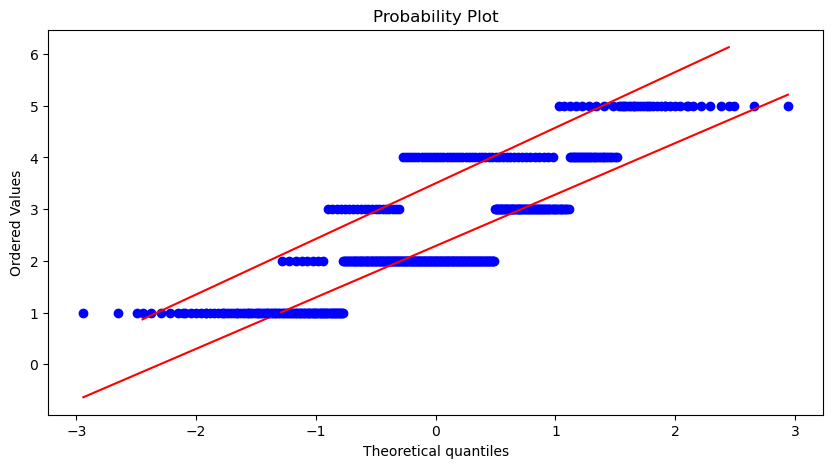

In [66]:
# t test
# 정규성, 독립성, 등분산성
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
import scipy.stats as stats

# 정규성 검사. shapiro-wilks test, Q-Q plot
# shapiro-wilks 검정은 샘플의 수가 적을때 정규성을 확인하기 좋다.
normal1 = shapiro(group_free['podcast_rating'])
normal2 = shapiro(group_premium['podcast_rating'])
print(normal1, normal2)

plt.figure(figsize=(10, 5))
stats.probplot(group_free['podcast_rating'], dist=stats.norm, plot=plt)
stats.probplot(group_premium['podcast_rating'], dist=stats.norm, plot=plt)
# 등분산성 검사. levene test
print(levene(group_free['podcast_rating'], group_premium['podcast_rating']))

등분산성은 만족하지만 정규성은 만족하지 못한다.

In [55]:
# levene = levene(free, premium)
# print('LeveneResult(stat = %.3f, pvalue = %.3f)' % levene)

podcast_t = ttest_ind(group_free['podcast_rating'], group_premium['podcast_rating'], equal_var=False)
print(podcast_t)

Ttest_indResult(statistic=-9.482193718199664, pvalue=1.1006927062715759e-16)


## bootstrapping (가설검증)
모수의 분포를 추정하는 방법으로 표본에서 추가적으로 표본을 복원 추출하고 각 표본에 대한 통계량을 다시 계산하는것.
bootstrapping 으로 신뢰구간을 구해서 관찰된 통계량이 실제로 모집단의 통계량을 반영하는지 유의미한지 판단하는 방법. 

1. 200개의 표본 중 하나를 뽑아 기록하고 다시 제자리에 둔다
2. 이를 n 번 반복한다.
3. n번 재표본추출한 값의 평균을 구한다.
4. 1~3단계를 R 번 반복한다. (R: 부트스트랩 반복 횟수)
5. 평균에 대한 결과를 R개 사용하여 신뢰구간을 구한다. 

표본이 200개밖에 없더라도 200개보다 더 많은 통계량을 구할 수 있다. 따라서 모수를 더 정확히 추정할 수 있다. 

프리미엄, 프리의 두 그룹의 표본크기가 다르고 t test 의 독립성, 정규성, 등분산성을 확인할 방법이 없기 때문에 더 정확한 결과를 위해 bootstrapping을 사용한다.

In [56]:
#표본의 Bootstrapping 을 이용한 신뢰구간
#200 표본 복원 추출. 5000번 반복. 99%의 신뢰구간

import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

iter = 10000
difflst = []
for _ in tqdm(range(iter)):
    boots = df.sample(200, replace=True)
    premium_mean = boots[boots['group'] == 'premium']['podcast_rating'].mean()
    free_mean = boots[boots['group'] == 'free']['podcast_rating'].mean()
    diff = premium_mean - free_mean
    difflst.append(diff)
    
print(f'1% 구간 {np.percentile(difflst, 1)}', f'99% 구간 {np.percentile(difflst, 99)}')

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:05<00:00, 1948.80it/s]

1% 구간 0.7106869199553741 99% 구간 1.6696437747901738


<Axes: ylabel='Count'>

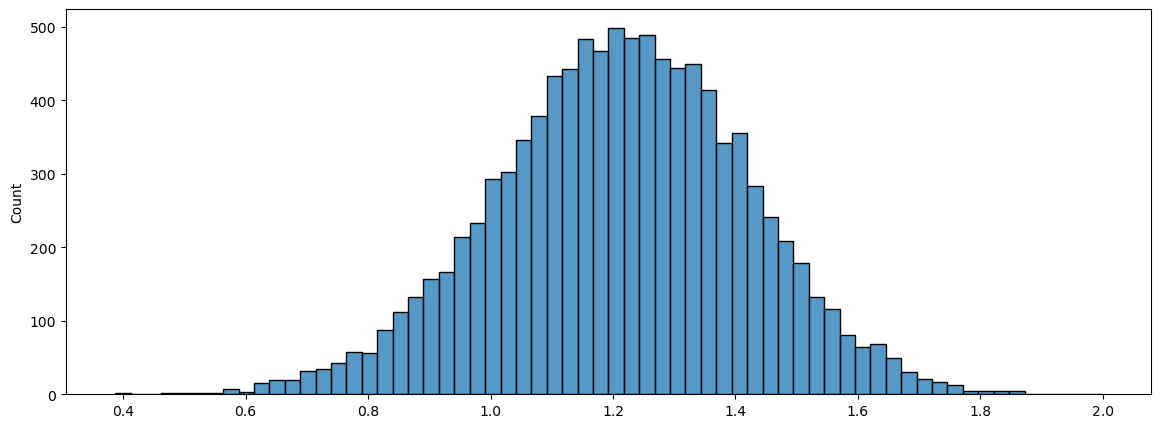

In [57]:
# 통계량 분포
plt.figure(figsize=(14, 5))
sns.histplot(difflst)

bootstrapping 신뢰구간 확인 결과 신뢰수준 99%로 프리미엄 고객의 평점이 무료 고객의 평점보다 높음. 

모수인 평균 차이 1.2123 가 신뢰구간 (0.7, 1.68) 사에 있다는 사실을 알 수 있음. 

따라서 프리이엄 고객이 무료 고객보다 팟캐스트를 선호한다는 가설을 참으로 판정 

In [58]:
pd.DataFrame(difflst).to_csv('bootrapping.csv', index=False)

## 재표본추출과 순열검정 

### 순열검정
두개 이상의 표본을 결합한 후 샘플을 무작위로 리샘플링 하여 최종적으로 두 집단 간의 차이가 있는지 판단하는 검정 방법

모집단의 분포가 정규분포를 따르지 않거나 모집단의 분포를 알 수 없을 때 사용, 비모수검정 방법 중 하나

1. 두 표본의 평균의 차이를 계산후 두 표본을 섞는다.
2. 무작위로 두 그룹으로 나눈다
3. 이때 두 그룹은 원래 표본의 크기와 동일하게 만든다.
4. 이렇게 나눈 두 그룹에서 다시 평균의 차이를 계산
5. 위의 과정을 여러번 반복하여 원래 표본의 평균차이가 무작위로 나눈 그룹의 평균 차이보다 크거나 작은 경우를 헤아려 p-값을 계산

In [59]:
# group_free = group_free['podcast_rating']
# group_premium = group_premium['podcast_rating']
# print(len(group_free))
# print(len(group_premium))

In [60]:
# # 순열검정
# #https://velog.io/@to_world/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D-chapter7 참고

# import numpy as np
# #difference in means

# #number of permutations
# num_permutations = 10000

# def statistic(x, y):
#     return np.mean(x) - np.mean(y)

# def permutation_test(x, y):
#     obs_diff = statistic(x, y)
#     all = np.append(x, y)
#     diffs = []
#     np.random.seed(42)
#     for _ in range(num_permutations):
        
#         idx = np.random.permutation(len(all))
#         x_ = all[idx[:len(x)]]
#         y_ = all[idx[len(x):]]
#         print(x_.mean(), y_.mean())

#         diffs.append(statistic(x_, y_))

#     less_pvalue = np.sum(diffs < obs_diff) / num_permutations
#     greater_pvalue = np.sum(diffs > obs_diff) / num_permutations
#     return obs_diff, np.minimum(less_pvalue, greater_pvalue) * 2
    
# permutation_test(group_premium, group_free)

In [61]:
# group_a = df[df['group'] == 'free']['podcast']
# group_b = df[df['group'] == 'premium']['podcast']
# a_sample_size = group_a.shape[0]
# b_sample_size = group_b.shape[0]
# print(a_sample_size, b_sample_size)

In [62]:
group_a = group_premium['podcast_rating']
group_b = group_free.sample(n=96, random_state=42)['podcast_rating']

### 비율 카이제곱 검정 확인
### 비율로 선호 차이 확인

In [63]:
# 카이제곱 독립성 검증
# https://ecologyandevolution.org/statsdocs/online-stats-manual-chapter4.html#:~:text=Calculating%20Expected%20Values%20for%20Cells%20in%20Contingency%20Tables&text=The%20expected%20value%20for%20each,dividing%20by%20the%20grand%20total. 
# https://www.analyticsvidhya.com/blog/2023/03/discovering-insights-with-chi-square-tests-a-hands-on-approach-in-python/
# 범주형 (qualitative) 자료의 집단간 동질성 여부를 통계적으로 검증하거나 두변수간의 상관성을 통계적으로 검증 (비모수적)
# 모수 검증은 정규성을 가정, 비모수 검증은 모집단의 분포를 가정하지 않음.
# use cross table for contingency table and chi2_contingency for actual test
from scipy.stats import chi2_contingency

#프리미엄, 프리의 태블로에 있는 선호 카테고리 명수를 contingency table 로 변환 --> chi2_contingency
obs = pd.DataFrame({'premium' : [10, 15], 'free': [10, 65]})
obs.index = ['music', 'd']

result = chi2_contingency(obs, correction=False)
print(result[0])
print(result[1])

obs

8.333333333333334
0.003892417122778637


,premium,free
music,10,10
d,15,65
